In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre

In [2]:
datafile = u"/root/LR_ML/newData4.xlsx"
TIP0 = pd.read_excel(datafile)

In [3]:
TIP = pd.DataFrame(TIP0)

In [4]:
TIP.head()

,SBPI,SBPL,DBPI,DBPL,BPMI,BPML,LOP,NOTE
0,133,139,85,87,83,87,145.0,NaN
1,135,128,89,82,92,96,140.0,NaN
2,113,104,64,63,70,69,125.0,NaN
3,116,118,73,62,72,74,120.0,NaN
4,105,100,68,70,85,82,110.0,NaN


In [5]:
modTIP = TIP.drop(['NOTE'], axis = 1)
modTIP1 = pre.MinMaxScaler(feature_range=(0, 1))
modTIP2 = modTIP1.fit_transform(modTIP.drop(['LOP'], axis = 1))
print("\nMin max scaled data:\n", modTIP2)
modTIP3 = pd.DataFrame(modTIP2, columns = ['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'])
modTIP3['LOP'] = TIP['LOP']



Min max scaled data:
 [[0.89189189 0.88636364 0.62162162 0.84375    0.5625     0.72727273]
 [0.94594595 0.63636364 0.72972973 0.6875     0.84375    1.        ]
 [0.35135135 0.09090909 0.05405405 0.09375    0.15625    0.18181818]
 [0.43243243 0.40909091 0.2972973  0.0625     0.21875    0.33333333]
 [0.13513514 0.         0.16216216 0.3125     0.625      0.57575758]
 [0.37837838 0.18181818 0.         0.125      0.625      0.60606061]
 [0.27027027 0.31818182 0.21621622 0.0625     0.15625    0.66666667]
 [0.         0.34090909 0.05405405 0.03125    0.375      0.        ]
 [0.37837838 0.34090909 0.05405405 0.15625    0.34375    0.36363636]
 [0.18918919 0.18181818 0.05405405 0.125      0.46875    0.60606061]
 [0.37837838 0.52272727 0.24324324 0.40625    0.5625     0.45454545]
 [0.40540541 0.20454545 0.24324324 0.40625    0.09375    0.06060606]
 [0.37837838 0.90909091 0.54054054 0.75       1.         0.90909091]
 [0.43243243 0.36363636 0.59459459 0.3125     0.         0.03030303]
 [1.       

             SBPI        SBPL       DBPI       DBPL       BPMI       BPML  \
count   21.000000   21.000000  21.000000  21.000000  21.000000  21.000000   
mean   115.571429  116.857143  72.904762  69.285714  78.952381  77.666667   
std      9.447600   11.992855  11.157530   9.450624   8.634096   9.183318   
min    100.000000  100.000000  62.000000  60.000000  65.000000  63.000000   
25%    111.000000  109.000000  64.000000  62.000000  72.000000  71.000000   
50%    114.000000  114.000000  70.000000  65.000000  79.000000  78.000000   
75%    116.000000  121.000000  82.000000  73.000000  83.000000  83.000000   
max    137.000000  144.000000  99.000000  92.000000  97.000000  96.000000   

              LOP  
count   21.000000  
mean   125.433333  
std     11.589838  
min    110.000000  
25%    119.300000  
50%    120.000000  
75%    138.500000  
max    145.000000  
SBPI    0
SBPL    0
DBPI    0
DBPL    0
BPMI    0
BPML    0
LOP     0
NOTE    0
dtype: int64
          SBPI      SBPL      DBP

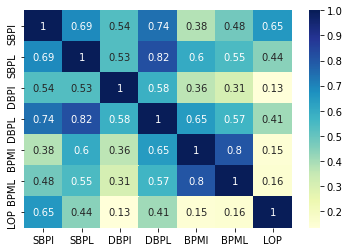

            SBPI       SBPL       DBPI       DBPL       BPMI       BPML  \
count  21.000000  21.000000  21.000000  21.000000  21.000000  21.000000   
mean    0.420849   0.383117   0.294723   0.290179   0.436012   0.444444   
std     0.255341   0.272565   0.301555   0.295332   0.269816   0.278282   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.297297   0.204545   0.054054   0.062500   0.218750   0.242424   
50%     0.378378   0.318182   0.216216   0.156250   0.437500   0.454545   
75%     0.432432   0.477273   0.540541   0.406250   0.562500   0.606061   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

              LOP  
count   21.000000  
mean   125.433333  
std     11.589838  
min    110.000000  
25%    119.300000  
50%    120.000000  
75%    138.500000  
max    145.000000  
          SBPI      SBPL      DBPI      DBPL      BPMI      BPML       LOP
SBPI  1.000000  0.691820  0.535112  0.744000  0.379772  0.480058  0.6

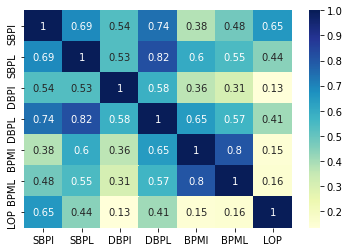

In [6]:
#檢驗數據
print(modTIP.describe())#數據描述，會顯示最值，平均數等信息，可以簡單判斷數據中是否有異常值
print(TIP[TIP.isnull()==True].count())#檢驗缺失值，若輸出爲0，說明該列沒有缺失值
#輸出相關係數，判斷是否值得做線性迴歸模型
print(modTIP.corr())#0-0.3弱相關；0.3-0.6中相關；0.6-1強相關；
sns.heatmap(modTIP.corr(),annot=True, cmap="YlGnBu")
# sns.pairplot(modTIP, x_vars=['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'], y_vars='LOP', height=7, aspect=0.8, kind='reg')
# plt.savefig(u"/root/LR_ML/modData_Sorted4_pairplot.png")
plt.show()
print(modTIP3.describe())
print(modTIP3.corr())
H = sns.heatmap(modTIP3.corr(),annot=True, cmap="YlGnBu")
#通過seaborn添加一條最佳擬合直線和95%的置信帶，直觀判斷相關關係
# P = sns.pairplot(modTIP3, x_vars=['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'], y_vars='LOP', height=7, aspect=0.8, kind='reg')
# F = H.get_figure()
# F.savefig(u"/root/LR_ML/modData_Sorted4_correlation.png")
# plt.savefig(u"/root/LR_ML/modData_Sorted4_pairplot_normalization.png")
plt.show()

自變量---源數據: (21, 5) ；  訓練集: (16, 5) ；  測試集: (5, 5)
因變量---源數據: (21,) ；  訓練集: (16,) ；  測試集: (5,)
擬合參數:截距 91.49986742694901 ,迴歸係數： [ 0.97413766 -0.73338255  0.13968066 -1.13871821  0.66894665]
最佳擬合線: Y =  91.5 + 0.97 * X1 +  -0.73 * X2


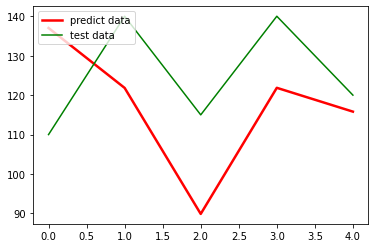

自變量---源數據: (21, 5) ；  訓練集: (16, 5) ；  測試集: (5, 5)
因變量---源數據: (21,) ；  訓練集: (16,) ；  測試集: (5,)
擬合參數:截距 126.08313649492518 ,迴歸係數： [ 21.01242638  -7.41157784  -3.4975424  -42.79482714  31.85632143]
最佳擬合線: Y =  126.08 + 21.01 * X1 +  -7.41 * X2


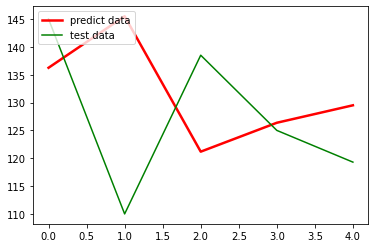

In [7]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.iloc[:,1:6],modTIP.LOP,train_size=0.8)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.iloc[:,1:6].shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",TIP.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#調用線性規劃包
model = LinearRegression()
model.fit(X_train,Y_train)#線性迴歸訓練
a  = model.intercept_#截距
b = model.coef_#迴歸係數
print("擬合參數:截距",a,",迴歸係數：",b)
#顯示線性方程，並限制參數的小數位爲兩位
print("最佳擬合線: Y = ",round(a,2),"+",round(b[0],2),"* X1 + ",round(b[1],2),"* X2")
Y_pred = model.predict(X_test)#對測試集數據，用predict函數預測
plt.plot(range(len(Y_pred)),Y_pred,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_test)),Y_test,'green',label="test data")
plt.legend(loc=2)
plt.show()#顯示預測值與測試值曲線

X_train1,X_test1,Y_train1,Y_test1 = train_test_split(modTIP3.iloc[:,1:6],modTIP.LOP,train_size=0.8)
print("自變量---源數據:",modTIP3.iloc[:,1:6].shape, "；  訓練集:",X_train1.shape, "；  測試集:",X_test1.shape)
print("因變量---源數據:",TIP.LOP.shape, "；  訓練集:",Y_train1.shape, "；  測試集:",Y_test1.shape)
model1 = LinearRegression()
model1.fit(X_train1,Y_train1)
c  = model1.intercept_
d = model1.coef_
print("擬合參數:截距",c,",迴歸係數：",d)
print("最佳擬合線: Y = ",round(c,2),"+",round(d[0],2),"* X1 + ",round(d[1],2),"* X2")
Y_pred1 = model1.predict(X_test1)
plt.plot(range(len(Y_pred1)),Y_pred1,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_test1)),Y_test1,'green',label="test data")
plt.legend(loc=2)
# plt.savefig(u"/root/LR_ML/modData_Sorted4_evaluation.png")
plt.show()